# Predicting Early Diagnosis of Coronary Heart Disease With SPECT Images  

## By Aminu Abdusalam and Adetunji Akinola
## 10/13/2020 

# Data Set Information:



The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images. Each of the patients is classified into two categories: normal and abnormal. The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images. As a result, 44 continuous feature pattern was created for each patient. The pattern was further processed to obtain 22 binary feature patterns. The CLIP3 algorithm was used to generate classification rules from these patterns. The CLIP3 algorithm generated rules that were 84.0% accurate (as compared with cardilogists' diagnoses).

SPECT is a good data set for testing ML algorithms; it has 267 instances that are descibed by 23 binary attributes



# Attribute Information:


1. OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
2. F1: 0,1 (the partial diagnosis 1, binary)
3. F2: 0,1 (the partial diagnosis 2, binary)
4. F3: 0,1 (the partial diagnosis 3, binary)
5. F4: 0,1 (the partial diagnosis 4, binary)
6. F5: 0,1 (the partial diagnosis 5, binary)
7. F6: 0,1 (the partial diagnosis 6, binary)
8. F7: 0,1 (the partial diagnosis 7, binary)
9. F8: 0,1 (the partial diagnosis 8, binary)
10. F9: 0,1 (the partial diagnosis 9, binary)
11. F10: 0,1 (the partial diagnosis 10, binary)
12. F11: 0,1 (the partial diagnosis 11, binary)
13. F12: 0,1 (the partial diagnosis 12, binary)
14. F13: 0,1 (the partial diagnosis 13, binary)
15. F14: 0,1 (the partial diagnosis 14, binary)
16. F15: 0,1 (the partial diagnosis 15, binary)
17. F16: 0,1 (the partial diagnosis 16, binary)
18. F17: 0,1 (the partial diagnosis 17, binary)
19. F18: 0,1 (the partial diagnosis 18, binary)
20. F19: 0,1 (the partial diagnosis 19, binary)
21. F20: 0,1 (the partial diagnosis 20, binary)
22. F21: 0,1 (the partial diagnosis 21, binary)
23. F22: 0,1 (the partial diagnosis 22, binary)
- dataset is divided into:
-- training data ("SPECT.train" 80 instances)
-- testing data ("SPECT.test" 187 instances)



## Dataset repository has preprocessed/split datasets into testing and training.

# 1.  Import data

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sys
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, plot_confusion_matrix

In [3]:


training_dataset = pd.read_csv("https://archive.ics.uci.edu"
                 "/ml/machine-learning-databases/spect"
                 "/SPECT.train",header = None,
                 delimiter = r",\s*",
                 na_values ="?",
                 engine = "python" 
                )

testing_dataset = pd.read_csv("https://archive.ics.uci.edu"
                 "/ml/machine-learning-databases/spect"
                 "/SPECT.test",header = None,
                 delimiter = r",\s*",
                 na_values ="?",
                 engine = "python" 
                )



In [4]:
training_dataset.head()
testing_dataset.head()
merged_dataset = training_dataset.append(testing_dataset, ignore_index=True)
merged_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


# Check how much data is missing

In [52]:
# print(training_dataset.shape)
# print(testing_dataset.shape)
# print(merged_dataset.isna().sum())

There are no missing data.

# 2. Identify which columns are independent and dependent variables

**Column 0 is represents the dependent variable and Columns (1 - 22) represent independent variables**

# 3. What columns are nominal and what columns are ordinal (including binary category data)?

**Columns (1 - 22) are nominal categorical data**

# 4. Complete code to convert categorical data to numerical data, standardized scale data.



Although attributes are originally categorical the datasets contain the categorcical data already converted to numerical data

# Get x and y numpy arrays 

In [6]:
x = merged_dataset.iloc[:,:-1].values
y = merged_dataset.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=None)
print(x_train.shape)
print(x_test.shape)

(200, 22)
(67, 22)


# Standardize

In [112]:
standard_scaler = StandardScaler()

scaled_x_train = standard_scaler.fit_transform(x_train)
scaled_x_test = standard_scaler.transform(x_test)

print(scaled_x_train)

[[ 0.46056619  1.11677706 -0.60045334 ...  1.70925967  1.39326109
   1.27733275]
 [ 0.46056619  1.11677706  1.66540833 ...  1.70925967 -0.71774056
  -0.78288136]
 [-2.17124059 -0.89543386 -0.60045334 ... -0.58504861  1.39326109
  -0.78288136]
 ...
 [ 0.46056619 -0.89543386 -0.60045334 ... -0.58504861 -0.71774056
  -0.78288136]
 [ 0.46056619  1.11677706 -0.60045334 ... -0.58504861  1.39326109
   1.27733275]
 [ 0.46056619  1.11677706  1.66540833 ...  1.70925967  1.39326109
   1.27733275]]


# 5. Use logistic regression, support vector machine and neural network to train models and use the trained model to test.


## a. Logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [55]:
param_range = np.logspace(-4,4,9)
print(param_range)
param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=LogisticRegression(tol=1e0), 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("The accuracy for the training data is :", gs.best_estimator_.score(x_train,y_train))
print("The accuracy for the test data is :",gs.best_estimator_.score(x_test,y_test))
print("Confusion matrix for training data: \n", confusion_matrix(y_train, y_train_pred))
print("Confusion matrix for test data: \n", confusion_matrix(y_test, y_test_pred))

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1.0, verbose=0,
                   warm_start=False)
{'C': 0.1}
The accuracy for the training data is : 0.75
The accuracy for the test data is : 0.746268656716418
Confusion matrix for training data: 
 [[92 20]
 [30 58]]
Confusion matrix for test data: 
 [[36  9]
 [ 8 14]]


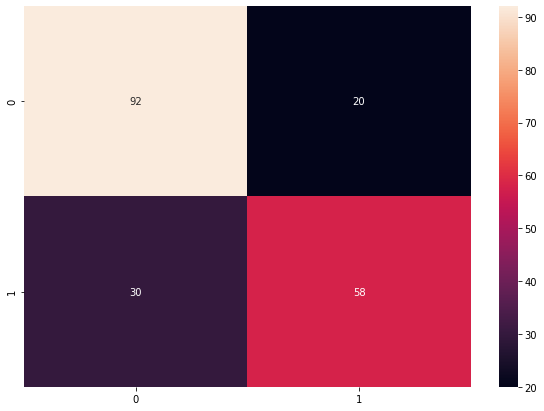

In [56]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_train, annot=True)

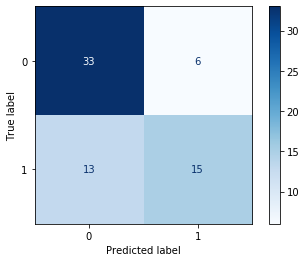

In [38]:
plot_confusion_matrix(gs.best_estimator_, x_test, y_test,
                                 cmap=plt.cm.Blues)

In [81]:
# Find hyper parameters that gives best precision score.
param_range = np.logspace(-4,4,9)
param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=LogisticRegression(tol=1e0), 
                  param_grid=param_grid, 
                  scoring='precision',
                  cv=5)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

print("The precision for the training data is :", 
      precision_score(y_train, y_train_pred))
print("The precision for the test data is :",
      precision_score(y_test, y_test_pred))
print("Confusion matrix for training data: \n", confusion_matrix(y_train, y_train_pred))
print("Confusion matrix for test data: \n", confusion_matrix(y_test, y_test_pred))

C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1.0, verbose=0,
                   warm_start=False)
{'C': 0.01}
The precision for the training data is : 0.8260869565217391
The precision for the test data is : 0.7272727272727273
Confusion matrix for training data: 
 [[104   8]
 [ 50  38]]
Confusion matrix for test data: 
 [[42  3]
 [14  8]]


In [7]:
# Find hyper parameters that gives best recall score.
param_range = np.logspace(-4,4,18)
param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=LogisticRegression(tol=1e0), 
                  param_grid=param_grid, 
                  scoring='recall',
                  cv=5)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

print("The recall for the training data is :", 
      recall_score(y_train, y_train_pred))
print("The recall for the test data is :",
      recall_score(y_test, y_test_pred))


LogisticRegression(C=0.5817091329374358, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1.0, verbose=0,
                   warm_start=False)
{'C': 0.5817091329374358}
The recall for the training data is : 0.6746987951807228
The recall for the test data is : 0.6666666666666666


In [87]:
# Find hyper parameters that gives best F1 score.
param_range = np.logspace(-2,2,9)
param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator=LogisticRegression(tol=1e-4), 
                  param_grid=param_grid, 
                  scoring='f1',
                  cv=5)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

print("The F1 score for the training data is :", 
      f1_score(y_train, y_train_pred))
print("The F1 for the test data is :",
      f1_score(y_test, y_test_pred))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.1}
The F1 score for the training data is : 0.703030303030303
The F1 for the test data is : 0.6222222222222223


# b. Support Vector Machine

In [71]:
from sklearn.svm import SVC

In [92]:
from sklearn.svm import SVC

param_C_range = np.logspace(-4,2,num=5)
param_g_range = np.logspace(-2, 2,num=5)
param_grid = [{'C': param_C_range, 
               'kernel': ['linear']},
              {'C': param_C_range, 
               'gamma': param_g_range, 
               'kernel': ['rbf']},
              {'C': param_C_range,
               'degree': [2,3],
               'kernel': ['poly']}]

gs = GridSearchCV(estimator=SVC(tol=1e-4), 
                  param_grid=param_grid, 
                  cv=5,
                 scoring="accuracy")

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
print("The accuracy for the training data is :", gs.best_estimator_.score(x_train,y_train))
print("The accuracy for the test data is :",gs.best_estimator_.score(x_test,y_test))

SVC(C=3.1622776601683795, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0001, verbose=False)
{'C': 3.1622776601683795, 'gamma': 0.01, 'kernel': 'rbf'}
The accuracy for the training data is : 0.745
The accuracy for the test data is : 0.7313432835820896


In [93]:
from sklearn.svm import SVC

param_C_range = np.logspace(-4,2,num=5)
param_g_range = np.logspace(-2, 2,num=5)
param_grid = [{'C': param_C_range, 
               'kernel': ['linear']},
              {'C': param_C_range, 
               'gamma': param_g_range, 
               'kernel': ['rbf']},
              {'C': param_C_range,
               'degree': [2,3],
               'kernel': ['poly']}]

gs = GridSearchCV(estimator=SVC(tol=1e-4), 
                  param_grid=param_grid, 
                  cv=5,
                 scoring="precision")

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
print("The precision for the training data is :", gs.best_estimator_.score(x_train,y_train))
print("The precision for the test data is :",gs.best_estimator_.score(x_test,y_test))

C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
{'C': 0.1, 'degree': 3, 'kernel': 'poly'}
The accuracy for the training data is : 0.77
The accuracy for the test data is : 0.746268656716418


In [95]:
from sklearn.svm import SVC

param_C_range = np.logspace(-4,2,num=5)
param_g_range = np.logspace(-2, 2,num=5)
param_grid = [{'C': param_C_range, 
               'kernel': ['linear']},
              {'C': param_C_range, 
               'gamma': param_g_range, 
               'kernel': ['rbf']},
              {'C': param_C_range,
               'degree': [2,3],
               'kernel': ['poly']}]

gs = GridSearchCV(estimator=SVC(tol=1e-4), 
                  param_grid=param_grid, 
                  cv=5,
                 scoring="recall")

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
print("The recall for the training data is :", gs.best_estimator_.score(x_train,y_train))
print("The recall for the test data is :",gs.best_estimator_.score(x_test,y_test))

SVC(C=3.1622776601683795, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0001, verbose=False)
{'C': 3.1622776601683795, 'gamma': 0.01, 'kernel': 'rbf'}
The recall for the training data is : 0.745
The recall for the test data is : 0.7313432835820896


In [96]:
from sklearn.svm import SVC

param_C_range = np.logspace(-4,2,num=5)
param_g_range = np.logspace(-2, 2,num=5)
param_grid = [{'C': param_C_range, 
               'kernel': ['linear']},
              {'C': param_C_range, 
               'gamma': param_g_range, 
               'kernel': ['rbf']},
              {'C': param_C_range,
               'degree': [2,3],
               'kernel': ['poly']}]

gs = GridSearchCV(estimator=SVC(tol=1e-4), 
                  param_grid=param_grid, 
                  cv=5,
                 scoring="f1")

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
print("The f1 for the training data is :", gs.best_estimator_.score(x_train,y_train))
print("The f1 for the test data is :",gs.best_estimator_.score(x_test,y_test))

SVC(C=3.1622776601683795, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0001, verbose=False)
{'C': 3.1622776601683795, 'gamma': 0.01, 'kernel': 'rbf'}
The f1 for the training data is : 0.745
The f1 for the test data is : 0.7313432835820896


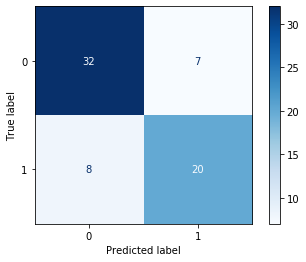

In [40]:
plot_confusion_matrix(gs.best_estimator_, x_test, y_test,
                                 cmap=plt.cm.Blues)

# c. Neural Network

In [46]:
from sklearn.neural_network import MLPClassifier

In [45]:
hls_range = [(m,n) for m in range(8,3,-2) for n in range(m,3,-2)]+[(n,) for n in range(8,3,-1)]
print(hls_range)
alpha_range = np.logspace(-2,2,5)
print(alpha_range)
param_grid = [{'alpha':alpha_range, 'hidden_layer_sizes':hls_range}]


gs = GridSearchCV(estimator=MLPClassifier(tol=1e-5, 
                                          learning_rate_init=0.02,
                                          max_iter=1000,
                                         random_state=1), 
                  param_grid=param_grid, 
                  cv=5)

gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
print("The accuracy for the training data is :", gs.best_estimator_.score(x_train,y_train))
print("The accuracy for the test data is :",gs.best_estimator_.score(x_test,y_test))

[(8, 8), (8, 6), (8, 4), (6, 6), (6, 4), (4, 4), (8,), (7,), (6,), (5,), (4,)]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=10.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8), learning_rate='constant',
              learning_rate_init=0.02, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'alpha': 10.0, 'hidden_layer_sizes': (8, 8)}
The accuracy for the training data is : 0.78
The accuracy for the test data is : 0.7164179104477612


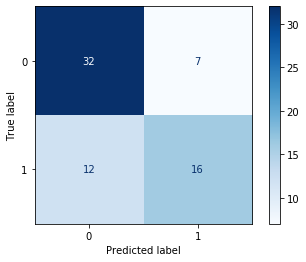

In [47]:
plot_confusion_matrix(gs.best_estimator_, x_test, y_test,
                                 cmap=plt.cm.Blues)

In [67]:
# Find hyper parameters that gives best precision score.
hls_range = [(m,n) for m in range(8,3,-2) for n in range(m,3,-2)]+[(n,) for n in range(8,3,-1)]
print(hls_range)
alpha_range = np.logspace(-2,2,5)
print(alpha_range)
param_grid = [{'alpha':alpha_range, 'hidden_layer_sizes':hls_range}]

gs = GridSearchCV(estimator=MLPClassifier(tol=1e-5, 
                                          learning_rate_init=0.02,
                                          max_iter=1000,
                                        random_state=1), 
                  scoring="precision",
                  param_grid=param_grid, 
                  cv=5)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

print("The precision for the training data is :", 
      precision_score(y_train, y_train_pred))
print("The precision for the test data is :",
      precision_score(y_test, y_test_pred))


[(8, 8), (8, 6), (8, 4), (6, 6), (6, 4), (4, 4), (8,), (7,), (6,), (5,), (4,)]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization ha

C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

MLPClassifier(activation='relu', alpha=10.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.02, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'alpha': 10.0, 'hidden_layer_sizes': (5,)}
The precision for the training data is : 0.7662337662337663
The precision for the test data is : 0.6086956521739131


In [8]:
# Find hyper parameters that gives best precision score.
hls_range = [(m,n) for m in range(8,3,-2) for n in range(m,3,-2)]+[(n,) for n in range(8,3,-1)]
print(hls_range)
alpha_range = np.logspace(-4,4,9)
print(alpha_range)
param_grid = [{'alpha':alpha_range, 'hidden_layer_sizes':hls_range}]

gs = GridSearchCV(estimator=MLPClassifier(tol=1e-5, 
                                          learning_rate_init=0.02,
                                          max_iter=1000,
                                        random_state=1), 
                  scoring="recall",
                  param_grid=param_grid, 
                  cv=6)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

print("The recall for the training data is :", 
      recall_score(y_train, y_train_pred))
print("The recall for the test data is :",
      recall_score(y_test, y_test_pred))


[(8, 8), (8, 6), (8, 4), (6, 6), (6, 4), (4, 4), (8,), (7,), (6,), (5,), (4,)]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8), learning_rate='constant',
              learning_rate_init=0.02, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'alpha': 0.01, 'hidden_layer_sizes': (8, 8)}
The precision for the training data is : 0.9036144578313253
The precision for the test data is : 0.5555555555555556


In [70]:
# Find hyper parameters that gives best precision score.
hls_range = [(m,n) for m in range(8,3,-2) for n in range(m,3,-2)]+[(n,) for n in range(8,3,-1)]
print(hls_range)
alpha_range = np.logspace(-2,2,5)
print(alpha_range)
param_grid = [{'alpha':alpha_range, 'hidden_layer_sizes':hls_range}]

gs = GridSearchCV(estimator=MLPClassifier(tol=1e-5, 
                                          learning_rate_init=0.02,
                                          max_iter=1000,
                                        random_state=1), 
                  scoring="f1",
                  param_grid=param_grid, 
                  cv=5)
gs.fit(x_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
#Retrain the data with the best estimater

gs.best_estimator_.fit(x_train, y_train)
y_train_pred = gs.best_estimator_.predict(x_train)
y_test_pred = gs.best_estimator_.predict(x_test)

print("The f1 score for the training data is :", 
      precision_score(y_train, y_train_pred))
print("The f1 score for the test data is :",
      precision_score(y_test, y_test_pred))


[(8, 8), (8, 6), (8, 4), (6, 6), (6, 4), (4, 4), (8,), (7,), (6,), (5,), (4,)]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ps4ka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=10.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 4), learning_rate='constant',
              learning_rate_init=0.02, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'alpha': 10.0, 'hidden_layer_sizes': (8, 4)}
The precision for the training data is : 0.7662337662337663
The precision for the test data is : 0.6086956521739131
